## SHORT VERSION

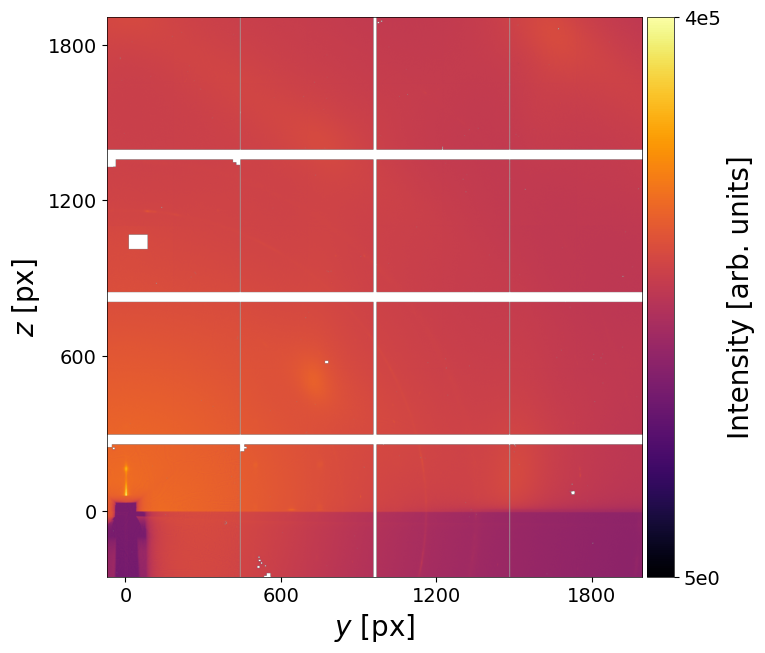

INFO - Saved in C:\Users\Ainur Abukaev\Downloads\mlgid_pygid\pygid\example\240124_PEN_DIP_result.h5 in group entry_0000
INFO - Saved figure in C:\Users\Ainur Abukaev\Downloads\mlgid_pygid\pygid\example\240124_PEN_DIP_polar_0000.png


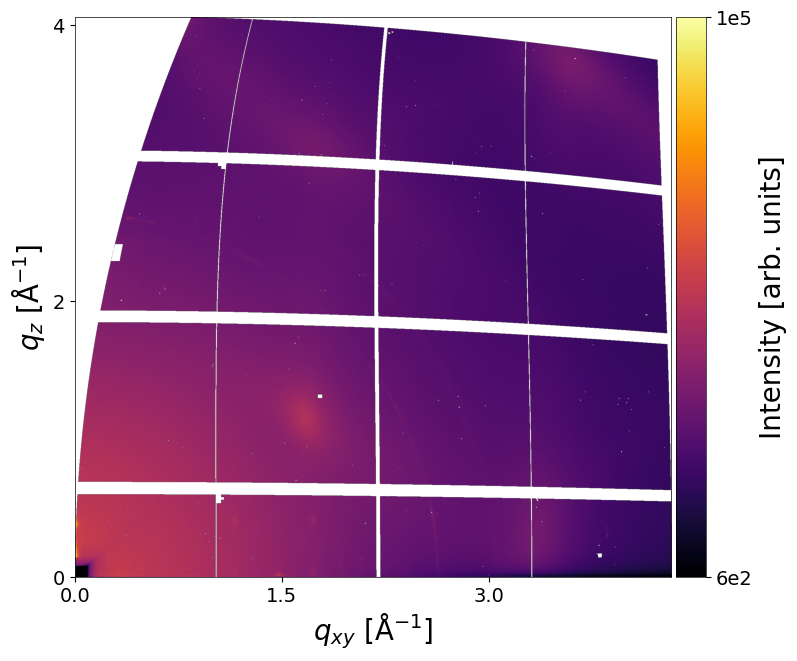

In [1]:
import pygid

# Define file name, dataset and frame number
data_path = r"eiger4m_0000_240124_PEN_DIP.edf"
dataset = None
frame_num = None

poni_path = r'LaB6_2024_07_ESRF_ID10.poni'
mask_path = r'mask_2024_07_ESRF_ID10.npy'

# Create experimental metadata (optional)
exp_metadata = pygid.ExpMetadata(
          start_time = r"2024-07-12T08:25:41Z",
          end_time = r"2024-07-12T08:26:22Z",
          source_type = "synchrotron",
          source_name = "ESRF ID10",
          detector_name = "eiger4m",
          instrument_name = "ID10"
)

# Load sample metadata from YAML file (optional)
smpl_metadata = pygid.SampleMetadata(path_to_load="240124_PEN_DIP_metadata.yaml")

# Load PONI file
params = pygid.ExpParams(poni_path=poni_path,
                         mask_path=mask_path,
                         fliplr=True, flipud=True, transp=False, ai=0.075)

# Create coordinate maps instance based on the angle of incidence and experimental parameters
matrix = pygid.CoordMaps(params, vert_positive=True, hor_positive=True)

# Image loading
analysis = pygid.Conversion(matrix=matrix, path=data_path, dataset=dataset, frame_num=frame_num)


# Set plot parameters (optional)
analysis.set_plot_defaults(axes_labelsize=20, figsize = (9, 7))

# Plot raw image
analysis.plot_img_raw()

# GID geometry
# Conversion to cylindrical axes, plotting, saving
q_xy, q_z, img = analysis.det2q_gid(
    plot_result = True, # plot the result of conversion
    clims = (600, 1e5), # image color limits
    save_fig = True, path_to_save_fig = "240124_PEN_DIP_polar.png", # save the image
    return_result = True, # return the result of conversion
    save_result = True, path_to_save = "240124_PEN_DIP_result.h5", # save the result of conversion as HDF5 NXsas file
    overwrite_file = False, # add to the existing file
    exp_metadata = exp_metadata, smpl_metadata = smpl_metadata # save experimental and sample metadata
)
# q_abs, ang, img = analysis.det2pol_gid(plot_result = True)
# q_rad, q_azim, img = analysis.det2pseudopol_gid(plot_result = True)

## Transmission geometry
# q_xy, q_z, img  = analysis.det2q(plot_result = True, return_result = True)
# q_abs, ang, img = analysis.det2pol(plot_result = True, return_result = True)
# q_rad, q_azim, img = analysis.det2pseudopol_gid(plot_result = True, return_result = True)

## DETAILED VERSION

In [ ]:
# package import
import pygid

In [27]:
poni_path = r'LaB6_2024_07_ESRF_ID10.poni'
mask_path = r'mask_2024_07_ESRF_ID10.npy'

# create the ExpParams instance manually

params = pygid.ExpParams(
    mask_path=mask_path, # path to the mask file (EDF/NPY/TIFF)
    fliplr=True,  # Flag for horizontal flipping (left-right)
    flipud=True,  # Flag for vertical flipping (up-down)
    transp=False,  # Flag for applying rotation
    SDD=0.3271661836504515,  # Sample-to-detector distance (in meters)
    wavelength=0.6199,  # Wavelength (in angstroms)
    rot1=-0.00263,  # Detector rotation angle along the horizontal direction (X axis) (in radians)
    rot2=-0.00465,  # Detector rotation angle along the vertical direction (Y axis) (in radians)
    centerX=2000,  # Beam position in the horizontal direction (in pixels)
    centerY=2145,  # Beam position in the vertical direction (in pixels)
    px_size=75e-6,  # Detector pixel size (in meters)
    count_range=(10, 10000),  # the intensity range is used to mask hot and dead pixels
    ai=0  # angle of incidence in GID experiments or list of angles (in degrees)
)

# or using PONI file

params = pygid.ExpParams(poni_path=poni_path, # path to the PONI file
                         mask_path=mask_path, # path to the mask file (EDF/NPY/TIFF)
                         fliplr=True, flipud=True, transp=False, ai=0.075)




In [29]:
# OPTIONAL

# add experimental and sample metadata (optional)

# dictionary like
exp_metadata = pygid.ExpMetadata(
    start_time=r"2021-03-29T15:51:41.343788",
    end_time=r"2024-07-12T08:26:22Z",
    source_type="synchrotron",
    source_name="ESRF ID10",
    detector="eiger4m",
    monitor = 1.1e5,
    extend_fields = ['monitor'] # list of fields to de appended to the existing data in the HDF5 file
)

# manually
data = {
    "name": "241107_C60",
    "structure": {
        "stack": "air | C60 | SiOx | Si",
        "materials": {
            "C60": {
                "name": "Buckminsterfullerene C60",
                "thickness": 25,  #optional
                "cif": "C60.cif",  #optional
                "type": "gradient film"  #optional /layer
            },
            "SiOx": {
                "name": "native SiOx",
                "thickness": 1,
            },
            "Si": {
                "name": "Si wafer",
            }
        }
    },
    "preparation": "gradient thin film prepared by thermal evaporation",
    "experimental_conditions": "standard conditions, on air"
}

smpl_metadata = pygid.SampleMetadata(data=data,
                                     path_to_save="240124_PEN_DIP_metadata.yaml" # to save the YAML file if necessary
)

# or using YAMl file

smpl_metadata = pygid.SampleMetadata(path_to_load="240124_PEN_DIP_metadata.yaml" # path to the YAML file
)

INFO - Saved sample metadata to C:\Users\Ainur Abukaev\Downloads\mlgid_pygid\pygid\example\sample.yaml


In [30]:
# create a CoordMaps instance based on the experimental parameters

matrix = pygid.CoordMaps(params,  # experimental parameters
                         q_xy_range=None, q_z_range=None, dq=0.003,  # q-range and resolution (in A-1) (optional)
                         ang_min=0, ang_max=90, dang=0.1,  # angle range and resolution (in degrees) (optional)
                         hor_positive=True, vert_positive=True,  # flags for only positive values of q in h (optional, recommended)
                         make_pol_corr=True,  # Flag to calculate polar correction matrix (optional)
                         make_solid_angle_corr=True,  # Flag to calculate solid angle correction matrix (optional)
                         make_air_attenuation_corr=False,  # Flag to calculate air attenuation correction matrix (optional)
                         air_attenuation_coeff=1,  # Linear coefficient for air attenuation correction (in 1/m)
                         make_sensor_attenuation_corr=False,  # Flag to calculate sensor attenuation correction matrix (optional)
                         sensor_attenuation_coeff=1,  # Linear coefficient for sensor attenuation correction (in 1/m)
                         sensor_thickness=0.1,  # Thickness of the detector sensor (in m)
                         make_absorption_corr=False,  # Flag to calculate absorption correction matrix (optional)
                         sample_attenuation_coeff=1,  # Linear coefficient for sample attenuation correction (in 1/m)
                         sample_thickness=200e-9,  # Thickness of the sample (in m)
                         make_lorentz_corr=False,  # Flag to calculate Lorentz correction matrix (optional)
                         powder_dim=3,  # Dimension of powder for Lorentz correction: 2 or 3
                         dark_current=None,  # Array for dark current values (optional)
                         flat_field=None,  # Array for flat field correction values (optional)
                         path_to_save=None,  # Path where coordinate map will be saved. Path format should be '.pkl' (optional)
                         path_to_load=None   # Path from which coordinate map will be loaded. Path format should be '.pkl' (optional)
)


In [31]:
# load the data
data_path = r"eiger4m_0000_240124_PEN_DIP.edf"
analysis = pygid.Conversion(matrix=matrix,
                            path=data_path,
                            dataset='/6.1/measurement/eiger4m', # for HDF5 files
                            frame_num=7, # for HDF5 files (num, list or None)
                            roi_range=[None, None, None, None], # Region of interest of the raw image before any rotations (in pixels)
                            average_all=False, # whether average all loaded images
                            number_to_average=2, # average every N images
)

# or if image is already loaded
img = None # your image
analysis = pygid.Conversion(matrix=matrix,
                            img_raw = img
)

C:\Users\Ainur Abukaev\Downloads\mlgid_pygid\pygid\pygid\conversion.py:351: UserWarning: 1 images left, averaging them separately.
  warnings.warn(f"{remaining} images left, averaging them separately.", UserWarning)
INFO - pol_corr_matrix was applied
INFO - solid_angle_corr_matrix was applied


In [38]:
# OPTIONAL
# set matplotlib parameters for all images using analysis.set_plot_defaults

analysis.set_plot_defaults(cmap = 'jet')

# or

analysis.set_plot_defaults(
    font_size=14,                 # Default font size for text elements (e.g., title, labels, ticks)
    axes_titlesize=14,            # Font size for axes titles
    axes_labelsize=18,            # Font size for axes labels (x and y)
    grid=False,                   # Whether to display gridlines
    grid_color='gray',            # Color of the gridlines
    grid_linestyle='--',          # Line style of the gridlines (e.g., '--', '-', ':')
    grid_linewidth=0.5,           # Width of the gridlines
    xtick_labelsize=14,           # Font size for x-axis tick labels
    ytick_labelsize=14,           # Font size for y-axis tick labels
    legend_fontsize=12,           # Font size for the legend text
    legend_loc='best',            # Location of the legend (e.g., 'best', 'upper right', 'lower left')
    legend_frameon=True,          # Whether to display a frame around the legend
    legend_borderpad=1.0,         # Padding between the legend's content and the legend's frame
    legend_borderaxespad=1.0,     # Padding between the legend and axes
    figure_titlesize=16,          # Font size for the figure title
    figsize=(6.4, 4.8),           # Size of the figure in inches (e.g., (6, 6))
    axes_linewidth=0.5,           # Width of the axes lines
    savefig_dpi=600,              # DPI for saving the figure (higher DPI = better quality)
    savefig_transparent=False,    # Whether the saved figure should have a transparent background
    savefig_bbox_inches=None,     # Defines what part of the plot to save (e.g., 'tight' to crop extra whitespace)
    savefig_pad_inches=0.1,       # Padding added around the figure when saving
    line_linewidth=2,             # Line width for plot lines
    line_color='blue',            # Color of the plot lines (e.g., 'blue', 'red')
    line_linestyle='-',           # Line style (e.g., '-', '--', ':')
    line_marker=None,             # Marker style for plot lines (e.g., 'o', 'x')
    scatter_marker='o',           # Marker style for scatter plots (e.g., 'o', 'x')
    scatter_edgecolors='black',   # Color for the edges of scatter plot markers
    cmap='inferno'                # Colormap for images (e.g., 'inferno', 'viridis')
)

In [2]:
# Plot and save the raw image
x, y, img = analysis.plot_img_raw(
    clims=(50, 1000),  # colormap limits
    frame_num = 0,  # number of frame to plot
    xlim = (10, 1000), ylim = (10, 1000),  # X and Y image limits
    save_fig = True, # whether save the image
    path_to_save_fig = '240124_PEN_DIP_raw.png', # path to the image file to save
    return_result = True, # whether return image with coordinates
    plot_result = False # False whether only save
    )

INFO - Saved figure in C:\Users\Ainur Abukaev\Downloads\mlgid_pygid\pygid\example\240124_PEN_DIP_raw.png


In [ ]:
# any manipulations with image before the conversion should be done at this step
# for example, background subtraction:
bkg_image = None
analysis.img_raw[0] -= bkg_image

# Take into account that the image already masked and flipped

INFO - Saved in C:\Users\Ainur Abukaev\Downloads\mlgid_pygid\pygid\example\result.h5 in group entry_0000


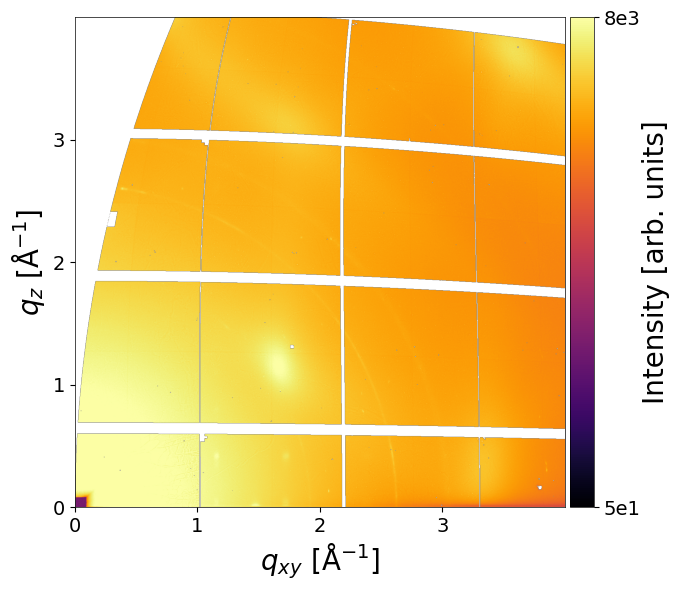

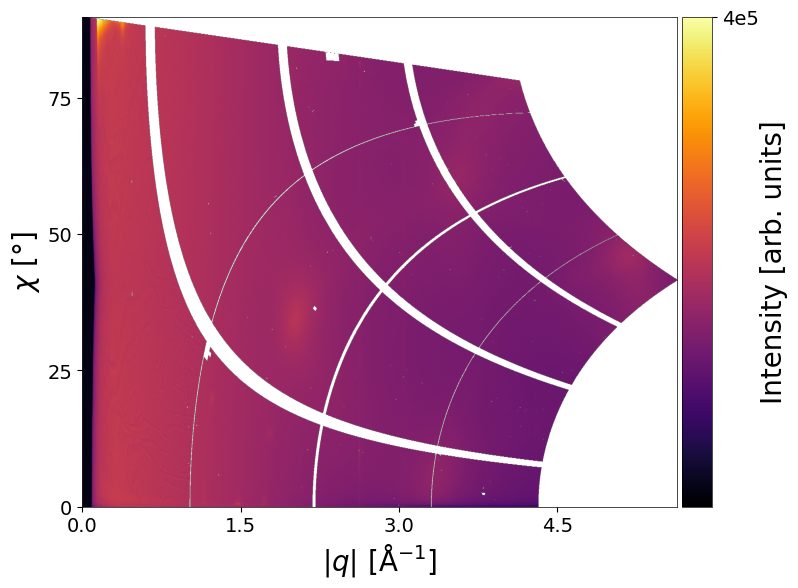

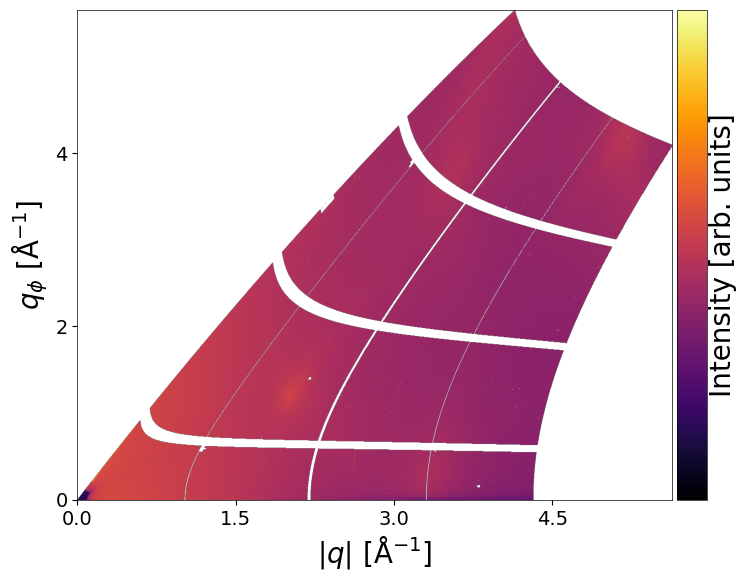

In [34]:
# image conversion
q_xy, q_z, img = analysis.det2q_gid(
    frame_num= None ,# frame number or list of numbers of loaded raw images to convert. If None, will convert all loaded images
    q_xy_range=(0, 4),  # tuple specifying the min and max of q_xy range. If None, uses full range.
    q_z_range=(0, 4),  # tuple specifying the min and max of q_z range. If None, uses full range.
    return_result=False,  # if True, returns the image data and corresponding axes. Default is False.
    save_result=True,  # flag to save the result as a NeXus (HDF5) file
    path_to_save="240124_PEN_DIP_result.h5",  # path to save the result with experimental params.
    h5_group="entry_0000",  # dataset name in the h5-file
    overwrite_file=True,  # whether to overwrite existing HDF5 file. Default is True.
    overwrite_group=False,  # whether to overwrite NXentry group in the HDF5 file. Default is True
    exp_metadata=exp_metadata,  # experiment metadata that will be saved with result
    smpl_metadata=smpl_metadata,  # sample metadata that will be saved with result
    plot_result=True,  # flag to plot the result
    clims=(50, 8000),  # Tuple specifying color limits (vmin, vmax) for the image.
    xlim=(None, None), ylim=(None, None),  # X and Y image limits
    save_fig=False,  # flag to save the results as a picture
    path_to_save_fig="240124_PEN_DIP.png",  # path to save the image
    interp_type="INTER_LINEAR",  # interpolation method used for remapping. Default is "INTER_LINEAR".
    multiprocessing=None, # key for multiprocessing mode activation. If None, uses default setting defined in Conversion class instance creation.
    )

analysis.det2pol_gid(plot_result=True, return_result=False, frame_num=0, save_result=False)
analysis.det2pseudopol_gid(plot_result=True, return_result=False, frame_num=0, save_result=False)


# Line profiles

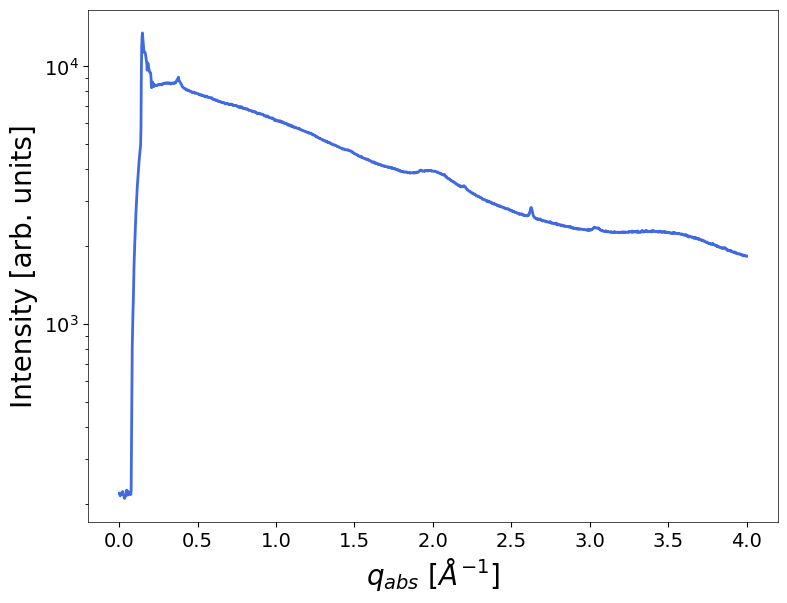

INFO - Saved in C:\Users\Ainur Abukaev\Downloads\mlgid_pygid\pygid\example\result.h5 in group entry_0000


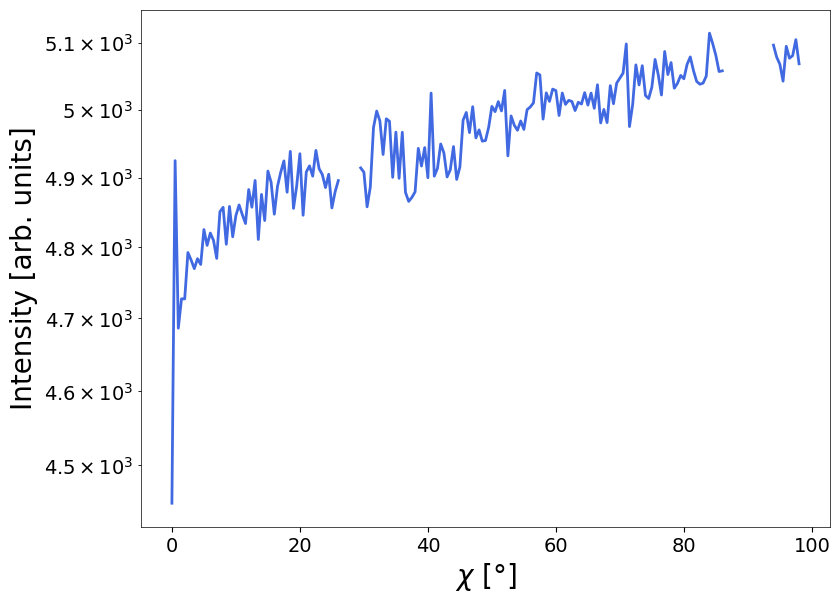

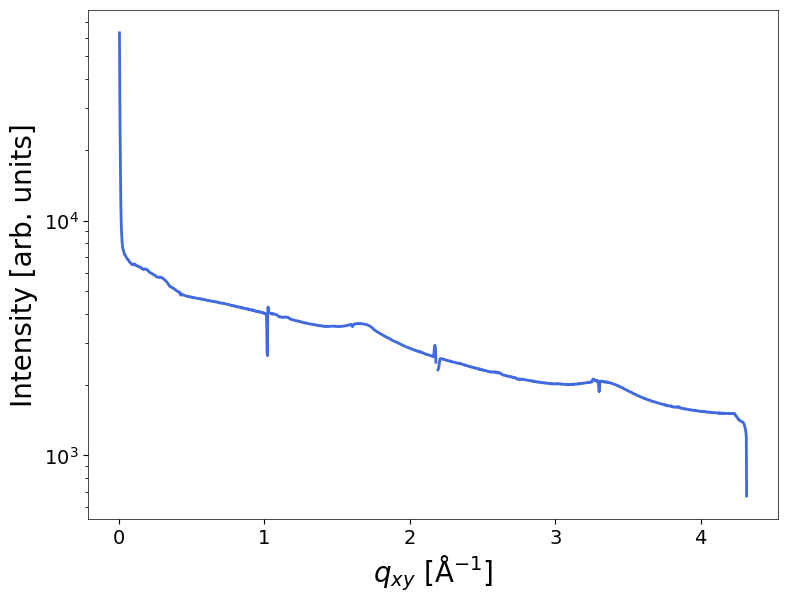

In [5]:
q, intensity = analysis.radial_profile_gid(
                    frame_num=None,                   # Frame number(s) to analyze; if None, all are processed
                    radial_range=(1,4),               # Radial q-range (min, max) in Å⁻¹; full range if None
                    angular_range=(0, 90),            # Angular range in degrees (min, max) for integration
                    dang=0.5,                         # Angular resolution in degrees for binning
                    dq=None,                          # Radial bin width in Å⁻¹; default binning if None
                    return_result=True,               # Return computed q-values, intensity profile
                    save_result=True,                 # Save computed profile to an NeXus (HDF5) file if True
                    path_to_save="result.h5",         # Path to save the result file
                    h5_group=None,                    # Group name in the HDF5 file; default if None
                    overwrite_file=False,             # Overwrite existing HDF5 file if True
                    overwrite_group=False,  # whether to overwrite NXentry group in the HDF5 file. Default is True
                    exp_metadata = exp_metadata,      # experiment metadata that will be saved with result
                    smpl_metadata = smpl_metadata,    # sample metadata that will be saved with result
                    plot_result=True,                 # Display the radial profile plot
                    shift=0.5,                        # Vertical shift between plotted lines for clarity
                    xlim=None,                        # X-axis limits as (min, max); auto-scaled if None
                    ylim=None,                        # Y-axis limits as (min, max); auto-scaled if None
                    save_fig=False,                   # Save the figure if True
                    path_to_save_fig="graph.tiff",    # Path to save the figure
                    multiprocessing=None,             # Use multiprocessing for faster computation if True
                )

chi, intensity = analysis.azim_profile_gid(radial_range = (1.34,1.4), angular_range = (0,180), return_result = True, plot_result = True, shift = 0.5)
q_xy, intensity = analysis.horiz_profile_gid(q_xy_range = None, q_z_range = (0, 3), return_result = True, plot_result = True, shift = 1)


In [ ]:
# Peak position simulation with pygidSIM (can be installed separately from https://github.com/mlgid-project/pygidSIM)
q_values, intensity, mi = analysis.make_simulation(
     frame_num=0, # Frame number to plot
     plot_result=True,  clims= (600, 1e5), # display the simulation result
     path_to_cif=r"DIP_thin_film_642482.cif",  # Path to the .cif file containing the crystal structure
     orientation=[0, 0, 1],   # Crystal orientation in space. None for the random orientation
     min_int=1e-3,            # Minimum intensity threshold for display
     vmin=0.0005, vmax=0.1,   # Normalization limits for the color scale of simulated data
     linewidth=1.5,           # Simulated peaks line thickness for visualization
     radius=0.1,              # Simulated peaks radius for visualization
     plot_mi=False,           # plot Miller indices
     return_result=True,      # return the simulation result
     save_result = True,  path_to_save = r'240124_PEN_DIP_simul_result.png', # save the result
)

In [4]:
result = analysis.make_simulation(frame_num=0, clims=(30, 8000),
                                  path_to_cif=r"DIP_thin_film_642482.cif", orientation=[0, 0, 1], min_int=5e-4,
                                  plot_result=True, vmin=0.5, vmax=1, linewidth=1.5, radius=0.1, plot_mi=False,
                                  return_result=True)

ValueError: pygidsim package is not installed.

## Batch analysis

In [ ]:
analysis = Conversion(matrix=matrix, path=data_path, img_loc_hdf5='1.1/measurement/eiger4m',
                      batch_size=32,  # maximum size of the batch (32 default)
                      )
analysis.det2q_gid(clims=(50, 1000), plot_result=False, return_result=False, multiprocessing=False, frame_num=None,
                   save_fig=False, path_to_save_fig="image.png",
                   save_result=True, path_to_save="file_example.h5",
                   overwrite_file=True, exp_metadata=exp_metadata, smpl_metadata=smpl_metadata)

## Angular scans

In [ ]:
import pygid

params = pygid.ExpParams(poni_path=r'LaB6_401mm.poni',
                         # mask_path = r'mask_new.npy',
                         fliplr=True, flipud=True, transp=False, ai=[0, 0.1, 0.2])

# OR

params = pygid.ExpParams(poni_path=r'LaB6_401mm.poni',
                         # mask_path = r'mask_new.npy',
                         fliplr=True, flipud=True, transp=False, scan="ascan om 0.04000 0.12000 16 5")

# OR

params = pygid.ExpParams(poni_path=r'LaB6_401mm.poni',
                         # mask_path = r'mask_new.npy',
                         fliplr=True, flipud=True, transp=False, scan="0.04000 0.12000 16")

matrix = pygid.CoordMaps(params, vert_positive=True, hor_positive=True)

analysis = pygid.Conversion(matrix=matrix, path=data_path, dataset='/1.1/measurement/eiger4m')
analysis.det2q_gid(clims=(50, 1000), plot_result=True)
